# Plotting using matplotlib

In [3]:
import pandas as pd

filename = "../00_Data/olympics_1896_2004.csv"

def preprocess():
    # Define categorical type
    medal_order = ['Gold', 'Silver', 'Bronze']
    medal_type = pd.CategoricalDtype(categories=medal_order, ordered=True)
    # You can also use this way: 
    # medal_type = pd.api.types.CategoricalDtype(categories=medal_order, ordered=True)
    print(pd.api.types.is_categorical_dtype(medal_type))
    column_names = ['Year', 'City', 'Sport', 'Discipline', 'Athlete_Name', 'NOC', 'Gender', 'Event', 'Event_Gender', 'Medal', 'Position']
    dtype_mapper = {  
        'Year': 'int16',
        'City': 'category',
        'Sport': 'string',
        'Discipline': 'string',
        'Athlete Name': 'string',
        'NOC': 'category',
        'Gender': 'category',
        'Event': 'string',
        'Event Gender': 'category',
        'Medal': medal_type,
        'Position': 'uint8'  # Nullable integer type
    }
    df = pd.read_csv(filename, skiprows=5, dtype=dtype_mapper, names=column_names, header=0, index_col=False)
    df.loc[24676,"Gender"] = 'Women'
    df = df.drop(labels=['Position'], axis=1)
    df.Sport = df.Sport.str.lower()
    df.Discipline = df.Discipline.str.lower()
    df.Event = df.Event.str.lower()
    df.NOC = df.NOC.str.upper()

    return df


oo = preprocess()
oo.head()

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\4051634808.py:11: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  print(pd.api.types.is_categorical_dtype(medal_type))


True


,Year,City,Sport,Discipline,Athlete_Name,NOC,Gender,Event,Event_Gender,Medal
0,1896,Athens,cycling,cycling track,"FLAMENG, Léon",FRA,Men,100km,M,Gold
1,1896,Athens,cycling,cycling track,"KOLETTIS, Georgios",GRE,Men,100km,M,Silver
2,1896,Athens,athletics,athletics,"LANE, Francis",USA,Men,100m,M,Bronze
3,1896,Athens,athletics,athletics,"SZOKOLYI, Alajos",HUN,Men,100m,M,Bronze
4,1896,Athens,athletics,athletics,"BURKE, Thomas",USA,Men,100m,M,Gold


In [4]:
def preprocess_2008():
    medal_order = ['Gold', 'Silver', 'Bronze']
    medal_type = pd.CategoricalDtype(categories=medal_order, ordered=True)
    column_names_2008 = ['City', 'Year', 'Sport', 'Discipline', 'Athlete_Name', 'NOC', 'Gender', 
                     'Event', 'Event_Gender', 'Medal', 'Position']


    dtype_mapper_2008 = {  
        'City': 'string',
        'Year': 'string',
        'Sport': 'string',
        'Discipline': 'string',
        'Athlete_Name': 'string',
        'NOC': 'category',
        'Gender': 'category',
        'Event': 'string',
        'Event_Gender': 'category',
        'Medal': 'string',
        'Position': 'string'  
    }

    df = pd.read_csv('../00_Data/olympics_2008.csv', dtype=dtype_mapper_2008, names=column_names_2008, header=0, index_col=False)

    df = df.dropna(subset=['Sport', 'Discipline', 'Athlete_Name', 'NOC', 'Gender',
       'Event', 'Event_Gender', 'Medal'] , how='all')
    df = df.fillna({'City': 'Beijing', 'Year': 2008})
    df.Year = df.Year.astype('int16')   
    df = df.drop_duplicates()
    df.Sport = df.Sport.str.lower()
    df.Discipline = df.Discipline.str.lower()
    df.Event = df.Event.str.lower()
    df.NOC = df.NOC.str.upper()
    df.Medal = df.Medal.str.capitalize()
    df.Medal = pd.Categorical(df.Medal, categories=medal_order, ordered=True)
    df = df.drop("Position", axis = 1)

    return df

oo_2008 = preprocess_2008()
oo_2008

,City,Year,Sport,Discipline,Athlete_Name,NOC,Gender,Event,Event_Gender,Medal
0,Beijing,2008,aquatics,diving,"GALPERIN, Gleb",RUS,Men,10m platform,M,Bronze
1,Beijing,2008,aquatics,diving,"MITCHAM, Matthew",AUS,Men,10m platform,M,Gold
2,Beijing,2008,aquatics,diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
3,Beijing,2008,aquatics,diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
4,Beijing,2008,aquatics,diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
...,...,...,...,...,...,...,...,...,...,...
2048,Beijing,2008,wrestling,wrestling gre-r,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
2049,Beijing,2008,wrestling,wrestling gre-r,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
2050,Beijing,2008,wrestling,wrestling gre-r,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
2051,Beijing,2008,wrestling,wrestling gre-r,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [5]:
oo = pd.concat([oo, oo_2008])
oo.shape

(29216, 10)

In [6]:
import matplotlib.pyplot as plt

In [7]:
first_games = oo[oo.Year == 1896]
first_games

,Year,City,Sport,Discipline,Athlete_Name,NOC,Gender,Event,Event_Gender,Medal
0,1896,Athens,cycling,cycling track,"FLAMENG, Léon",FRA,Men,100km,M,Gold
1,1896,Athens,cycling,cycling track,"KOLETTIS, Georgios",GRE,Men,100km,M,Silver
2,1896,Athens,athletics,athletics,"LANE, Francis",USA,Men,100m,M,Bronze
3,1896,Athens,athletics,athletics,"SZOKOLYI, Alajos",HUN,Men,100m,M,Bronze
4,1896,Athens,athletics,athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
...,...,...,...,...,...,...,...,...,...,...
146,1896,Athens,athletics,athletics,"CONNOLLY, James",USA,Men,triple jump,M,Gold
147,1896,Athens,athletics,athletics,"TUFFERI, Alexandre",FRA,Men,triple jump,M,Silver
148,1896,Athens,gymnastics,artistic g.,"WEINGÄRTNER, Hermann",GER,Men,vault,M,Bronze
149,1896,Athens,gymnastics,artistic g.,"SCHUMANN, Carl",GER,Men,vault,M,Gold


In [8]:
first_games.Sport.value_counts()

Sport
gymnastics       45
athletics        37
cycling          16
shooting         15
aquatics         11
tennis           10
fencing           8
weightlifting     6
wrestling         3
Name: count, dtype: Int64

<Axes: xlabel='Sport'>

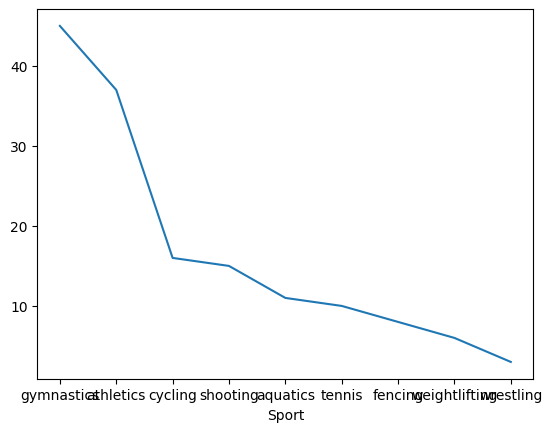

In [9]:
first_games.Sport.value_counts().plot(kind='line')

<Axes: xlabel='Sport'>

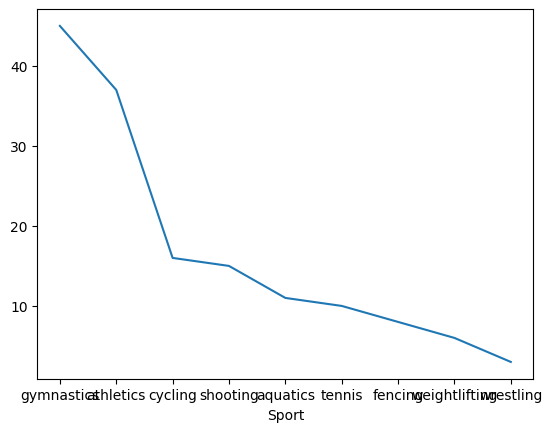

In [10]:
first_games.Sport.value_counts().plot()

<Axes: xlabel='Sport'>

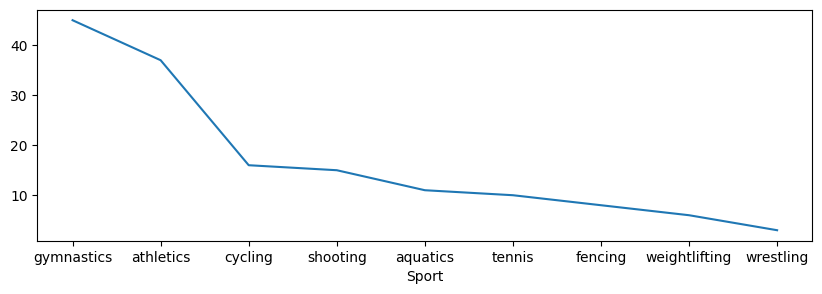

In [11]:
first_games.Sport.value_counts().plot(kind='line',figsize=(10,3))

<Axes: xlabel='Sport'>

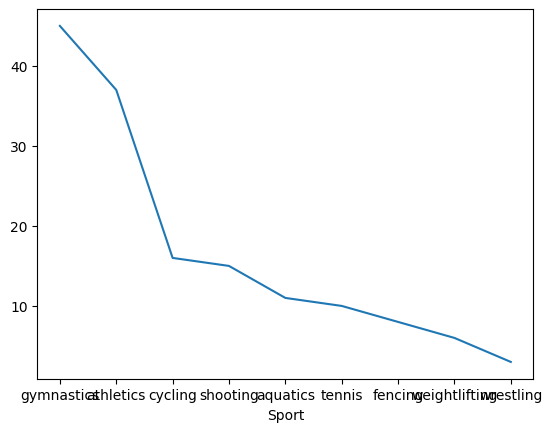

In [12]:
(first_games
    .Sport
    .value_counts()
    .plot()
)

<Axes: xlabel='Sport'>

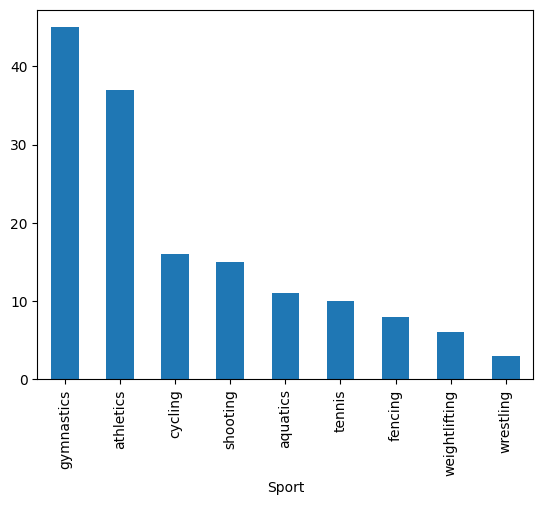

In [13]:
(first_games
    .Sport
    .value_counts()
    .plot(kind="bar")
)

<Axes: xlabel='Sport'>

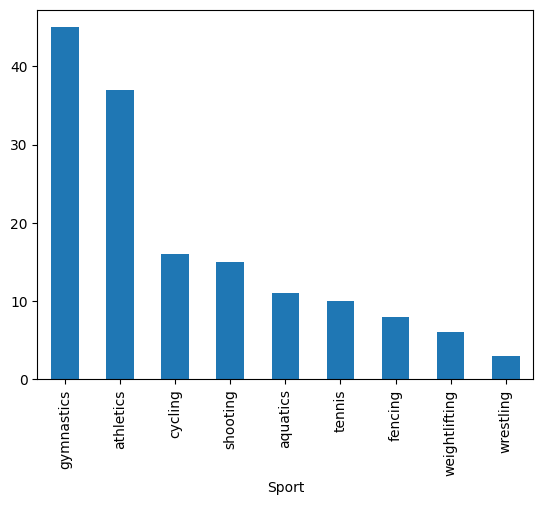

In [14]:
(first_games
    .Sport
    .value_counts()
    .plot
    .bar()
)

<Axes: ylabel='Sport'>

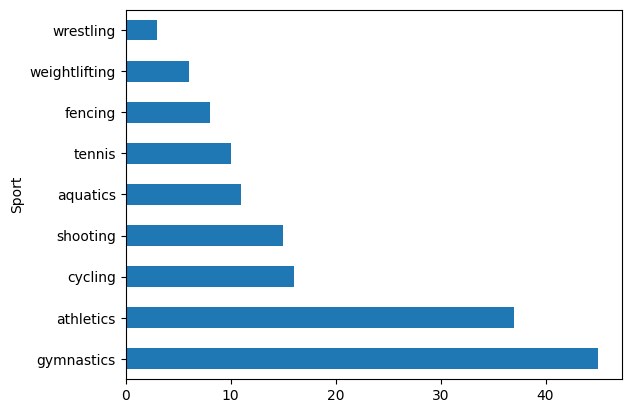

In [15]:
(first_games
    .Sport
    .value_counts()
    .plot
    .barh()
)

<Axes: xlabel='Sport'>

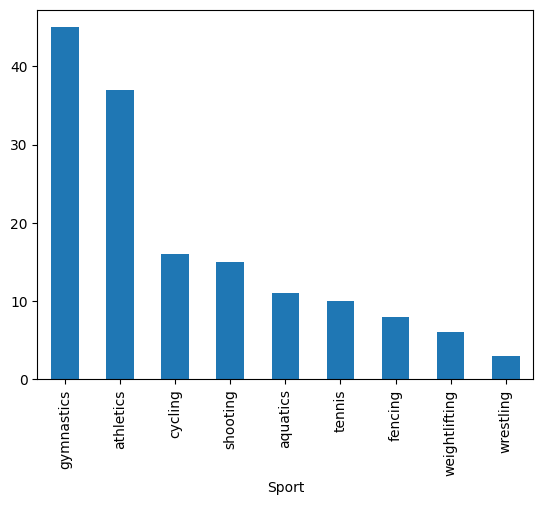

In [16]:
(first_games
    .Sport
    .value_counts()
    .plot
    .bar()
)

In [17]:
import seaborn as sns

<Axes: title={'center': 'Medals from 2000 games'}, xlabel='Medal', ylabel='count'>

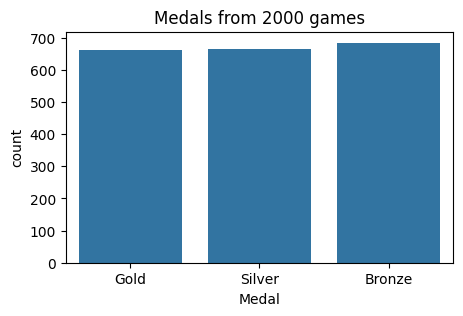

In [18]:
plt.figure(figsize=(5,3))
plt.title("Medals from 2000 games")
games = oo[oo.Year == 2000]
sns.countplot(data=games,
              x="Medal")

<Axes: title={'center': 'Medals from 2000 games'}, xlabel='Medal', ylabel='count'>

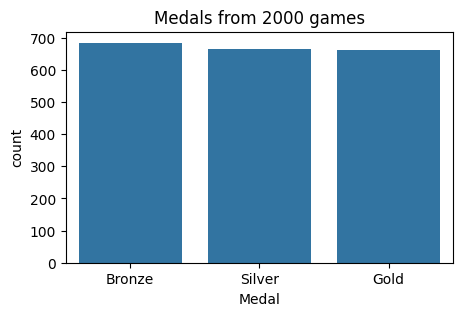

In [19]:
plt.figure(figsize=(5,3))
plt.title("Medals from 2000 games")
sns.countplot(data=games,
              x="Medal",
              order=["Bronze", "Silver", "Gold"]) # Change in order of medals

<Axes: title={'center': 'Medals from 2000 games'}, xlabel='Medal', ylabel='count'>

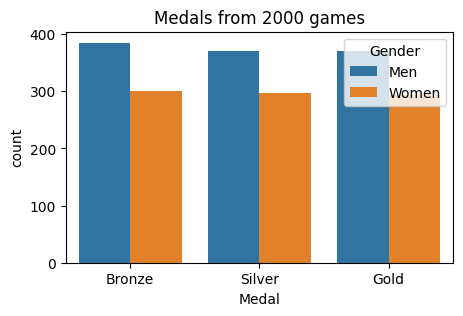

In [20]:
plt.figure(figsize=(5,3))
plt.title("Medals from 2000 games")
sns.countplot(data=games,
              x="Medal",
              order=["Bronze", "Silver", "Gold"],
              hue="Gender") # Change in order of medals

<Axes: title={'center': 'Medals from 2000 games'}, xlabel='Medal', ylabel='count'>

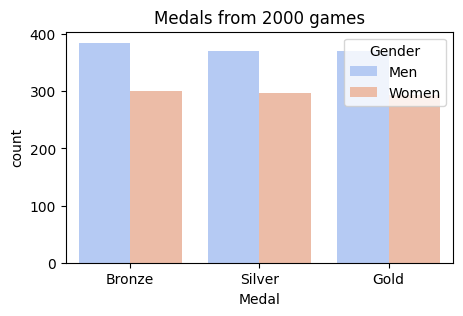

In [21]:
plt.figure(figsize=(5,3))
plt.title("Medals from 2000 games")
sns.countplot(data=games,
              x="Medal",
              order=["Bronze", "Silver", "Gold"],
              hue="Gender",
              palette="coolwarm") # Change in order of medals

<Axes: title={'center': 'Medals from 2000 games'}, xlabel='Medal', ylabel='count'>

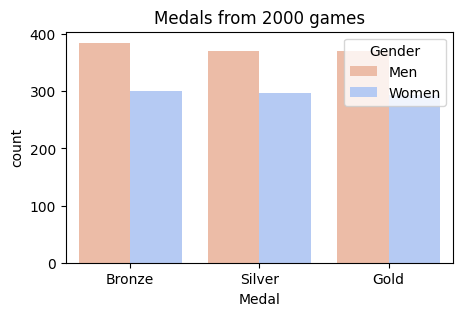

In [22]:
plt.figure(figsize=(5,3))
plt.title("Medals from 2000 games")
sns.countplot(data=games,
              x="Medal",
              order=["Bronze", "Silver", "Gold"],
              hue="Gender",
              palette="coolwarm_r") # Adding _r to palette reversed the colors

## Working with groupby

In [23]:
oo.dtypes

Year                     int16
City                    object
Sport           string[python]
Discipline      string[python]
Athlete_Name            object
NOC                     object
Gender                category
Event           string[python]
Event_Gender            object
Medal                 category
dtype: object

In [24]:
sprints = oo[(oo.Year == 2004) & ((oo.Event == '100m')|(oo.Event == '200m'))]
sprints

,Year,City,Sport,Discipline,Athlete_Name,NOC,Gender,Event,Event_Gender,Medal
25232,2004,Athens,athletics,athletics,"GREENE, Maurice",USA,Men,100m,M,Bronze
25233,2004,Athens,athletics,athletics,"GATLIN, Justin",USA,Men,100m,M,Gold
25234,2004,Athens,athletics,athletics,"OBIKWELU, Francis",POR,Men,100m,M,Silver
25235,2004,Athens,athletics,athletics,"CAMPBELL-BROWN, Veronica",JAM,Women,100m,W,Bronze
25236,2004,Athens,athletics,athletics,"NESTERENKO, Yuliya",BLR,Women,100m,W,Gold
25237,2004,Athens,athletics,athletics,"WILLIAMS, Lauryn",USA,Women,100m,W,Silver
25304,2004,Athens,athletics,athletics,"GATLIN, Justin",USA,Men,200m,M,Bronze
25305,2004,Athens,athletics,athletics,"CRAWFORD, Shawn",USA,Men,200m,M,Gold
25306,2004,Athens,athletics,athletics,"WILLIAMS, Bernard",USA,Men,200m,M,Silver
25307,2004,Athens,athletics,athletics,"FERGUSON-MCKENZIE, Debbie",BAH,Women,200m,W,Bronze


In [25]:
sp = sprints.groupby(["NOC", "Gender", "Event"])
sp

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\347591912.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sp = sprints.groupby(["NOC", "Gender", "Event"])


In [26]:
sp.count()

Year  City  Sport  Discipline  Athlete_Name  Event_Gender  \
NOC Gender Event                                                              
BAH Men    100m      0     0      0           0             0             0   
           200m      0     0      0           0             0             0   
    Women  100m      0     0      0           0             0             0   
           200m      1     1      1           1             1             1   
BLR Men    100m      0     0      0           0             0             0   
           200m      0     0      0           0             0             0   
    Women  100m      1     1      1           1             1             1   
           200m      0     0      0           0             0             0   
JAM Men    100m      0     0      0           0             0             0   
           200m      0     0      0           0             0             0   
    Women  100m      1     1      1           1             1             1   
           200m      1     1      1           1             1             1   
POR Men    100m      1     1      1           1             1             1   
           200m      0     0      0           0             0             0   
    Women  100m      0     0      0           0             0             0   
           200m      0     0      0           0             0             0   
USA Men    100m      2     2      2           2             2             2   
           200m      3     3      3           3             3             3   
    Women  100m      1     1      1           1             1             1   
           200m      1     1      1           1             1             1   

                  Medal  
NOC Gender Event         
BAH Men    100m       0  
           200m       0  
    Women  100m       0  
           200m       1  
BLR Men    100m       0  
           200m       0  
    Women  100m       1  
           200m       0  
JAM Men    100m       0  
           200m       0  
    Women  100m       1  
           200m       1  
POR Men    100m       1  
           200m       0  
    Women  100m       0  
           200m       0  
USA Men    100m       2  
           200m       3  
    Women  100m       1  
           200m       1

In [27]:
oo.groupby("Discipline").count()

,Year,City,Sport,Athlete_Name,NOC,Gender,Event,Event_Gender,Medal
Discipline,,,,,,,,,
archery,305,305,305,305,305,305,305,305,305
artistic g.,2103,2103,2103,2103,2103,2103,2103,2103,2103
athletics,3448,3448,3448,3448,3448,3448,3448,3448,3448
badminton,120,120,120,120,120,120,120,120,120
baseball,335,335,335,335,335,335,335,335,335
basketball,940,940,940,940,940,940,940,940,940
basque pelota,4,4,4,4,4,4,4,4,4
beach volley.,48,48,48,48,48,48,48,48,48
bmx,6,6,6,6,6,6,6,6,6


In [28]:
oo.groupby(["Year", "NOC","Medal"]).count()

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\1132358106.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  oo.groupby(["Year", "NOC","Medal"]).count()


City  Sport  Discipline  Athlete_Name  Gender  Event  \
Year NOC Medal                                                          
1896 AFG Gold       0      0           0             0       0      0   
         Silver     0      0           0             0       0      0   
         Bronze     0      0           0             0       0      0   
     AHO Gold       0      0           0             0       0      0   
         Silver     0      0           0             0       0      0   
...               ...    ...         ...           ...     ...    ...   
2008 ZIM Silver     3      3           3             3       3      3   
         Bronze     0      0           0             0       0      0   
     ZZX Gold       0      0           0             0       0      0   
         Silver     0      0           0             0       0      0   
         Bronze     0      0           0             0       0      0   

                 Event_Gender  
Year NOC Medal                 
1896 AFG Gold               0  
         Silver             0  
         Bronze             0  
     AHO Gold               0  
         Silver             0  
...                       ...  
2008 ZIM Silver             3  
         Bronze             0  
     ZZX Gold               0  
         Silver             0  
         Bronze             0  

[10764 rows x 7 columns]

In [29]:
for group_key, group_value in oo.groupby("Year"):
    print(group_key)
    print(group_value)

1896
     Year    City       Sport     Discipline          Athlete_Name  NOC  \
0    1896  Athens     cycling  cycling track         FLAMENG, Léon  FRA   
1    1896  Athens     cycling  cycling track    KOLETTIS, Georgios  GRE   
2    1896  Athens   athletics      athletics         LANE, Francis  USA   
3    1896  Athens   athletics      athletics      SZOKOLYI, Alajos  HUN   
4    1896  Athens   athletics      athletics         BURKE, Thomas  USA   
..    ...     ...         ...            ...                   ...  ...   
146  1896  Athens   athletics      athletics       CONNOLLY, James  USA   
147  1896  Athens   athletics      athletics    TUFFERI, Alexandre  FRA   
148  1896  Athens  gymnastics    artistic g.  WEINGÄRTNER, Hermann  GER   
149  1896  Athens  gymnastics    artistic g.        SCHUMANN, Carl  GER   
150  1896  Athens  gymnastics    artistic g.         ZUTTER, Louis  SUI   

    Gender        Event Event_Gender   Medal  
0      Men        100km            M    Gold  


In [30]:
oo.groupby("Year").size()

Year
1896     151
1900     512
1904     470
1908     804
1912     885
1920    1298
1924     884
1928     710
1932     615
1936     875
1948     814
1952     889
1956     885
1960     882
1964    1010
1968    1031
1972    1185
1976    1305
1980    1387
1984    1459
1988    1546
1992    1705
1996    1859
2000    2015
2004    1998
2008    2042
dtype: int64

In [31]:
oo.groupby(["Year","NOC"])["Medal"].count()

Year  NOC
1896  AUS      2
      AUT      5
      DEN      6
      FRA     11
      GBR      7
            ... 
2008  USA    315
      UZB      6
      VEN      1
      VIE      1
      ZIM      4
Name: Medal, Length: 1072, dtype: int64

In [32]:
oo.groupby(["Year","NOC", "Medal"]).size()

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\1715000319.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  oo.groupby(["Year","NOC", "Medal"]).size()


Year  NOC  Medal 
1896  AFG  Gold      0
           Silver    0
           Bronze    0
      AHO  Gold      0
           Silver    0
                    ..
2008  ZIM  Silver    3
           Bronze    0
      ZZX  Gold      0
           Silver    0
           Bronze    0
Length: 10764, dtype: int64

In [33]:
oo.groupby(["NOC"])["Year"].min()

NOC
AFG    2008
AHO    1988
ALG    1984
ANZ    1908
ARG    1924
       ... 
VIE    2000
YUG    1924
ZAM    1984
ZIM    1980
ZZX    1896
Name: Year, Length: 138, dtype: int16

In [34]:
oo.groupby(["NOC"])["Year"].max()

NOC
AFG    2008
AHO    1988
ALG    2008
ANZ    1912
ARG    2008
       ... 
VIE    2008
YUG    2000
ZAM    1996
ZIM    2008
ZZX    1904
Name: Year, Length: 138, dtype: int16

In [35]:
oo.groupby(["NOC"])["Year"].agg(["min","max","count"])

,min,max,count
NOC,,,
AFG,2008,2008,1
AHO,1988,1988,1
ALG,1984,2008,14
ANZ,1908,1912,29
ARG,1924,2008,239
...,...,...,...
VIE,2000,2008,2
YUG,1924,2000,435
ZAM,1984,1996,2


# Reshaping data - stack and unstack

In [36]:
sp = sprints.groupby(["NOC", "Gender", "Event"]).size()
sp

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\272320288.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sp = sprints.groupby(["NOC", "Gender", "Event"]).size()


NOC  Gender  Event
BAH  Men     100m     0
             200m     0
     Women   100m     0
             200m     1
BLR  Men     100m     0
             200m     0
     Women   100m     1
             200m     0
JAM  Men     100m     0
             200m     0
     Women   100m     1
             200m     1
POR  Men     100m     1
             200m     0
     Women   100m     0
             200m     0
USA  Men     100m     2
             200m     3
     Women   100m     1
             200m     1
dtype: int64

In [37]:
(sp
 .unstack("Gender", fill_value = 0) # Without fillvalue when data point is not present, it will give nan
 )

Gender     Men  Women
NOC Event            
BAH 100m     0      0
    200m     0      1
BLR 100m     0      1
    200m     0      0
JAM 100m     0      1
    200m     0      1
POR 100m     1      0
    200m     0      0
USA 100m     2      1
    200m     3      1

## Lot of Pandas examples here: [PandasTutor.com](https://pandastutor.com/)

In [38]:
(sp
 .unstack(level=1, fill_value = 0) # Same as above
 )

Gender     Men  Women
NOC Event            
BAH 100m     0      0
    200m     0      1
BLR 100m     0      1
    200m     0      0
JAM 100m     0      1
    200m     0      1
POR 100m     1      0
    200m     0      0
USA 100m     2      1
    200m     3      1

In [39]:
sprints_table = (sp
 .unstack(level=1, fill_value = 0) # Same as above
 )

sprints_table

Gender     Men  Women
NOC Event            
BAH 100m     0      0
    200m     0      1
BLR 100m     0      1
    200m     0      0
JAM 100m     0      1
    200m     0      1
POR 100m     1      0
    200m     0      0
USA 100m     2      1
    200m     3      1

In [40]:
sprints_table = (sp
 .unstack(level=1, fill_value = 0) 
 ).unstack(level=1, fill_value = 0)

sprints_table

Gender  Men      Women     
Event  100m 200m  100m 200m
NOC                        
BAH       0    0     0    1
BLR       0    0     1    0
JAM       0    0     1    1
POR       1    0     0    0
USA       2    3     1    1

In [41]:
sprints_NOC = sprints_table.stack("Gender")
sprints_NOC

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\3568702013.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  sprints_NOC = sprints_table.stack("Gender")


Event       100m  200m
NOC Gender            
BAH Men        0     0
    Women      0     1
BLR Men        0     0
    Women      1     0
JAM Men        0     0
    Women      1     1
POR Men        1     0
    Women      0     0
USA Men        2     3
    Women      1     1

In [42]:
sprints_NOC.index

MultiIndex([('BAH',   'Men'),
            ('BAH', 'Women'),
            ('BLR',   'Men'),
            ('BLR', 'Women'),
            ('JAM',   'Men'),
            ('JAM', 'Women'),
            ('POR',   'Men'),
            ('POR', 'Women'),
            ('USA',   'Men'),
            ('USA', 'Women')],
           names=['NOC', 'Gender'])

In [43]:
sprints_NOC.loc['USA',   'Men']

Event
100m    2
200m    3
Name: (USA, Men), dtype: int64

In [44]:
sprints_NOC.loc[('USA',   'Men'), '100m']

np.int64(2)

In [45]:
sprints_NOC.iloc[0:2]

Event       100m  200m
NOC Gender            
BAH Men        0     0
    Women      0     1

In [46]:
sprints_NOC.iloc[0:0]

,Event,100m,200m
NOC,Gender,,


# Exercises
## Question !: Plot all USA gold medal winner counts each year in a line chart with men shown in blue line and women in pink 

In [47]:
usa = oo[oo.NOC == "USA"]
usa

,Year,City,Sport,Discipline,Athlete_Name,NOC,Gender,Event,Event_Gender,Medal
2,1896,Athens,athletics,athletics,"LANE, Francis",USA,Men,100m,M,Bronze
4,1896,Athens,athletics,athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
14,1896,Athens,athletics,athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
23,1896,Athens,athletics,athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
28,1896,Athens,shooting,shooting,"PAINE, John",USA,Men,25m army pistol,M,Gold
...,...,...,...,...,...,...,...,...,...,...
1935,2008,Beijing,volleyball,volleyball,"TOM, Logan",USA,Women,volleyball,W,Silver
1936,2008,Beijing,volleyball,volleyball,"WILLOUGHBY, Kim",USA,Women,volleyball,W,Silver
1988,2008,Beijing,wrestling,wrestling free.,"CEJUDO, Henry",USA,Men,- 55kg,M,Gold
1998,2008,Beijing,wrestling,wrestling free.,"MILLER, Randi",USA,Women,55 - 63kg,W,Bronze


In [48]:
usa_gold = usa[usa.Medal == "Gold"]
usa_gold

,Year,City,Sport,Discipline,Athlete_Name,NOC,Gender,Event,Event_Gender,Medal
4,1896,Athens,athletics,athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
14,1896,Athens,athletics,athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
28,1896,Athens,shooting,shooting,"PAINE, John",USA,Men,25m army pistol,M,Gold
34,1896,Athens,athletics,athletics,"BURKE, Thomas",USA,Men,400m,M,Gold
40,1896,Athens,shooting,shooting,"PAINE, Sumner",USA,Men,50m pistol (60 shots),M,Gold
...,...,...,...,...,...,...,...,...,...,...
1885,2008,Beijing,volleyball,volleyball,"ROONEY, Sean",USA,Men,volleyball,M,Gold
1886,2008,Beijing,volleyball,volleyball,"SALMON, Riley",USA,Men,volleyball,M,Gold
1887,2008,Beijing,volleyball,volleyball,"STANLEY, Clayton",USA,Men,volleyball,M,Gold
1888,2008,Beijing,volleyball,volleyball,"TOUZINSKY, Scott",USA,Men,volleyball,M,Gold


In [49]:
usa_medals = usa.groupby(['Year','Gender'])['Medal'].count()
usa_medals

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\1121264436.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usa_medals = usa.groupby(['Year','Gender'])['Medal'].count()


Year  Gender
1896  Men        20
      Women       0
1900  Men        51
      Women       4
1904  Men       382
      Women      12
1908  Men        63
      Women       0
1912  Men       101
      Women       0
1920  Men       179
      Women      14
1924  Men       173
      Women      25
1928  Men        64
      Women      20
1932  Men       154
      Women      27
1936  Men        76
      Women      16
1948  Men       126
      Women      22
1952  Men       115
      Women      15
1956  Men        98
      Women      20
1960  Men        91
      Women      21
1964  Men       116
      Women      34
1968  Men       107
      Women      42
1972  Men       123
      Women      32
1976  Men       105
      Women      50
1984  Men       202
      Women     131
1988  Men       131
      Women      62
1992  Men       123
      Women     101
1996  Men       131
      Women     129
2000  Men       119
      Women     129
2004  Men       117
      Women     147
2008  Men       153
      W

In [50]:
unstacked_medals = usa_medals.unstack('Gender')
unstacked_medals

Gender,Men,Women
Year,,
1896,20,0
1900,51,4
1904,382,12
1908,63,0
1912,101,0
1920,179,14
1924,173,25
1928,64,20
1932,154,27


In [51]:
unstacked_medals.columns

CategoricalIndex(['Men', 'Women'], categories=['Men', 'Women'], ordered=False, dtype='category', name='Gender')

In [52]:
unstacked_medals.values[:,0]

array([ 20,  51, 382,  63, 101, 179, 173,  64, 154,  76, 126, 115,  98,
        91, 116, 107, 123, 105, 202, 131, 123, 131, 119, 117, 153])

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\1442820917.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usa_gold.groupby(['Year','Gender']).size().unstack('Gender').plot(kind='line')


<Axes: xlabel='Year'>

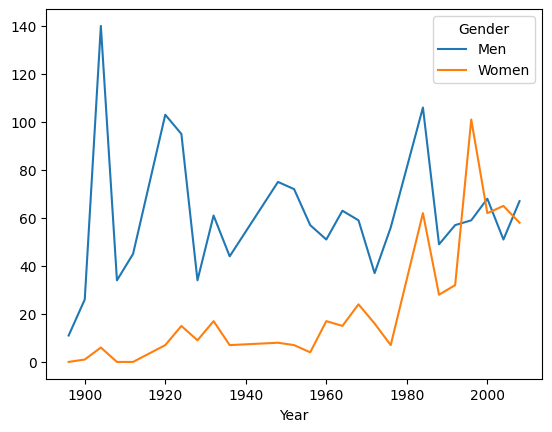

In [53]:
usa_gold.groupby(['Year','Gender']).size().unstack('Gender').plot(kind='line')

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\779022813.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  usa_gold.groupby(['Year','Gender']).size().unstack('Gender').plot(kind='line',color=['blue','pink'])


<Axes: xlabel='Year'>

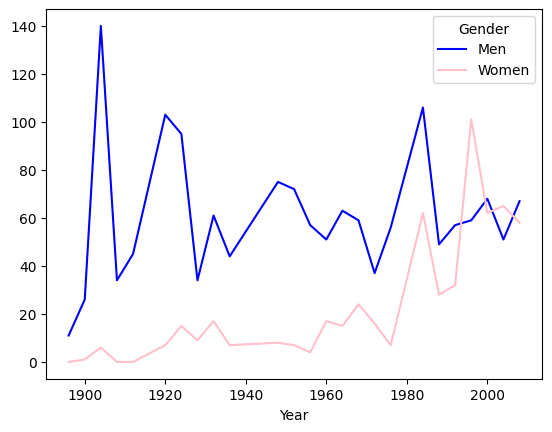

In [54]:
usa_gold.groupby(['Year','Gender']).size().unstack('Gender').plot(kind='line',color=['blue','pink'])

## Using a barchart, plot the 5 olympians who have won mosr number of medals. When there is a tie, consider silver and bronze medals

In [55]:
oo.groupby(["Athlete_Name","Medal"]).size()

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\1020324193.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  oo.groupby(["Athlete_Name","Medal"]).size()


Athlete_Name           Medal 
AABYE, Edgar           Gold      1
                       Silver    0
                       Bronze    0
AALTONEN, Arvo Ossian  Gold      0
                       Silver    0
                                ..
ÖSTMO, Ole             Silver    2
                       Bronze    2
ÖSTRAND, Per-Olof      Gold      0
                       Silver    0
                       Bronze    1
Length: 64239, dtype: int64

In [56]:
(oo.groupby(["Athlete_Name","Medal"])
    .size()
    .unstack("Medal")
 )

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\1442688131.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (oo.groupby(["Athlete_Name","Medal"])


Medal,Gold,Silver,Bronze
Athlete_Name,,,
"AABYE, Edgar",1,0,0
"AALTONEN, Arvo Ossian",0,0,2
"AALTONEN, Paavo Johannes",3,0,2
"AAMODT, Ragnhild",1,0,0
"AANING, Alf Lied",0,1,0
...,...,...,...
"ÖSTERVOLD, Jan Olsen",1,0,0
"ÖSTERVOLD, Kristian Olsen",1,0,0
"ÖSTERVOLD, Ole Olsen",1,0,0


In [57]:
(oo.groupby(["Athlete_Name","Medal"])
    .size()
    .unstack("Medal")
    .sort_values(["Gold","Silver","Bronze"], ascending=False)
 )

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\2788082798.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (oo.groupby(["Athlete_Name","Medal"])


Medal,Gold,Silver,Bronze
Athlete_Name,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0
...,...,...,...
"ZYCH, Boguslaw",0,0,1
"ZÄHRINGER, Klaus",0,0,1
"ZÜHLKE, Steffen",0,0,1


In [58]:
(oo.groupby(["Athlete_Name","Medal"])
    .size()
    .unstack("Medal")
    .sort_values(["Gold","Silver","Bronze"], ascending=False)[["Gold","Silver","Bronze"]]
)

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\1137968022.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (oo.groupby(["Athlete_Name","Medal"])


Medal,Gold,Silver,Bronze
Athlete_Name,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0
...,...,...,...
"ZYCH, Boguslaw",0,0,1
"ZÄHRINGER, Klaus",0,0,1
"ZÜHLKE, Steffen",0,0,1


In [59]:
(oo.groupby(["Athlete_Name","Medal"])
    .size()
    .unstack("Medal")
    .sort_values(["Gold","Silver","Bronze"], ascending=False)[["Gold","Silver","Bronze"]]
    .head(5)
)

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\635368624.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (oo.groupby(["Athlete_Name","Medal"])


Medal,Gold,Silver,Bronze
Athlete_Name,,,
"PHELPS, Michael",14,0,2
"LATYNINA, Larisa",9,5,4
"NURMI, Paavo",9,3,0
"SPITZ, Mark",9,1,1
"LEWIS, Carl",9,1,0


C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\3483944791.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (oo.groupby(["Athlete_Name","Medal"])


<Axes: xlabel='Athlete_Name'>

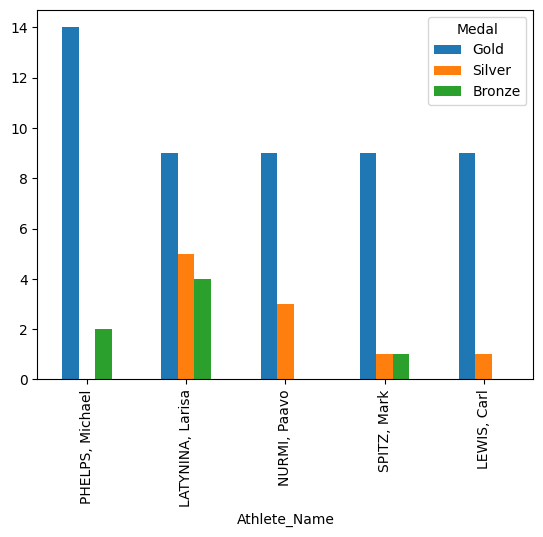

In [60]:
(oo.groupby(["Athlete_Name","Medal"])
    .size()
    .unstack("Medal")
    .sort_values(["Gold","Silver","Bronze"], ascending=False)[["Gold","Silver","Bronze"]]
    .head(5)
    .plot
    .bar()
)

### Colormap

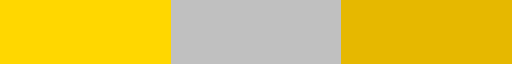

In [61]:
from matplotlib.colors import ListedColormap
custom_colormap = ['#FFD700', '#C0C0C0', '#E6B800']
colormap = ListedColormap(custom_colormap)
colormap

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\375583620.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (oo.groupby(["Athlete_Name","Medal"])


<Axes: xlabel='Athlete_Name'>

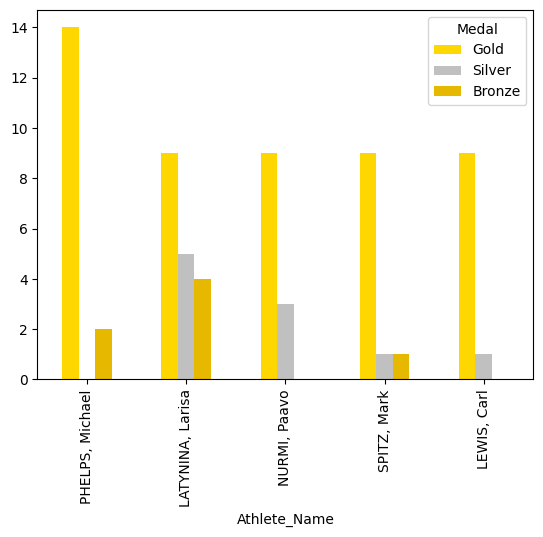

In [62]:
(oo.groupby(["Athlete_Name","Medal"])
    .size()
    .unstack("Medal")
    .sort_values(["Gold","Silver","Bronze"], ascending=False)[["Gold","Silver","Bronze"]]
    .head(5)
    .plot(kind="bar", colormap=colormap)
)

## For each Olyimpic Year present in the dataset, show the US olympian (and their sport) who has won the highest number of medals in that particular year.  In the case of tie, Gold>Silver>Bronze

## Include only one Olympian for each Olympic year i.e. if there are two Olympians in one year who have one exactly the same number and type of medals, then show only the first one based on sorting the names in reverese aphabetical order by surname.

In [ ]:
# Get all usa data
usa = oo[oo.NOC == "USA"]
usa

,Year,City,Sport,Discipline,Athlete_Name,NOC,Gender,Event,Event_Gender,Medal
2,1896,Athens,athletics,athletics,"LANE, Francis",USA,Men,100m,M,Bronze
4,1896,Athens,athletics,athletics,"BURKE, Thomas",USA,Men,100m,M,Gold
14,1896,Athens,athletics,athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold
23,1896,Athens,athletics,athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver
28,1896,Athens,shooting,shooting,"PAINE, John",USA,Men,25m army pistol,M,Gold
...,...,...,...,...,...,...,...,...,...,...
1935,2008,Beijing,volleyball,volleyball,"TOM, Logan",USA,Women,volleyball,W,Silver
1936,2008,Beijing,volleyball,volleyball,"WILLOUGHBY, Kim",USA,Women,volleyball,W,Silver
1988,2008,Beijing,wrestling,wrestling free.,"CEJUDO, Henry",USA,Men,- 55kg,M,Gold
1998,2008,Beijing,wrestling,wrestling free.,"MILLER, Randi",USA,Women,55 - 63kg,W,Bronze


In [88]:
table = (usa.groupby(["Year","Athlete_Name", "Medal", "Sport"])
 .size()
 .unstack("Medal")
 .sort_values(["Year", "Gold"], ascending=[True, False])
 )
table.head(), table.info()

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\895823430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = (usa.groupby(["Year","Athlete_Name", "Medal", "Sport"])


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2560200 entries, (np.int16(1896), 'BURKE, Thomas', 'athletics') to (np.int16(2008), 'ZORN, Zachary', 'wrestling')
Data columns (total 3 columns):
 #   Column  Dtype
---  ------  -----
 0   Gold    int64
 1   Silver  int64
 2   Bronze  int64
dtypes: int64(3)
memory usage: 68.5+ MB


(Medal                           Gold  Silver  Bronze
 Year Athlete_Name    Sport                          
 1896 BURKE, Thomas   athletics     2       0       0
      CLARK, Ellery   athletics     2       0       0
      GARRETT, Robert athletics     2       2       0
      CONNOLLY, James athletics     1       1       1
      CURTIS, Thomas  athletics     1       0       0,
 None)

In [91]:
table = (usa.groupby(["Year","Athlete_Name", "Medal", "Sport"])
 .size()
 .unstack("Medal", fill_value=0)
 .assign(Total=table["Gold"] + table["Silver"] + table["Bronze"])
 )
table.head()

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\1718006589.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = (usa.groupby(["Year","Athlete_Name", "Medal", "Sport"])


Medal                          Gold  Silver  Bronze  Total
Year Athlete_Name  Sport                                  
1896 ABAS, Stephen aquatics       0       0       0      0
                   archery        0       0       0      0
                   athletics      0       0       0      0
                   baseball       0       0       0      0
                   basketball     0       0       0      0

In [95]:
table.index

RangeIndex(start=0, stop=2560200, step=1)

In [92]:
table = (usa.groupby(["Year","Athlete_Name", "Medal", "Sport"])
 .size()
 .unstack("Medal", fill_value=0)
 .assign(Total=table["Gold"] + table["Silver"] + table["Bronze"])
 .reset_index()
 )
table.head()

C:\Users\MMATHUR\AppData\Local\Temp\ipykernel_23464\2873269907.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  table = (usa.groupby(["Year","Athlete_Name", "Medal", "Sport"])


Medal,Year,Athlete_Name,Sport,Gold,Silver,Bronze,Total
0,1896,"ABAS, Stephen",aquatics,0,0,0,0
1,1896,"ABAS, Stephen",archery,0,0,0,0
2,1896,"ABAS, Stephen",athletics,0,0,0,0
3,1896,"ABAS, Stephen",baseball,0,0,0,0
4,1896,"ABAS, Stephen",basketball,0,0,0,0


In [96]:
table.index

RangeIndex(start=0, stop=2560200, step=1)

In [97]:
for Year, group in table.groupby("Year"):
    print(group)

Medal   Year   Athlete_Name          Sport  Gold  Silver  Bronze  Total
0       1896  ABAS, Stephen       aquatics     0       0       0      0
1       1896  ABAS, Stephen        archery     0       0       0      0
2       1896  ABAS, Stephen      athletics     0       0       0      0
3       1896  ABAS, Stephen       baseball     0       0       0      0
4       1896  ABAS, Stephen     basketball     0       0       0      0
...      ...            ...            ...   ...     ...     ...    ...
102403  1896  ZORN, Zachary      triathlon     0       0       0      0
102404  1896  ZORN, Zachary     tug of war     0       0       0      0
102405  1896  ZORN, Zachary     volleyball     0       0       0      0
102406  1896  ZORN, Zachary  weightlifting     0       0       0      0
102407  1896  ZORN, Zachary      wrestling     0       0       0      0

[102408 rows x 7 columns]
Medal   Year   Athlete_Name          Sport  Gold  Silver  Bronze  Total
102408  1900  ABAS, Stephen       aqu

In [98]:
for Year, group in table.groupby("Year"):
    print(group.sort_values("Total", ascending=False))

Medal   Year           Athlete_Name          Sport  Gold  Silver  Bronze  \
32642   1896        GARRETT, Robert      athletics     2       2       0   
17988   1896        CONNOLLY, James      athletics     1       1       1   
16186   1896          CLARK, Ellery      athletics     2       0       0   
12616   1896          BURKE, Thomas      athletics     2       0       0   
71118   1896          PAINE, Sumner       shooting     1       1       0   
...      ...                    ...            ...   ...     ...     ...   
102371  1896  ZOCH, Jacqueline Jean     volleyball     0       0       0   
102372  1896  ZOCH, Jacqueline Jean  weightlifting     0       0       0   
102373  1896  ZOCH, Jacqueline Jean      wrestling     0       0       0   
102374  1896          ZORN, Zachary       aquatics     0       0       0   
39      1896  ABBOTT, Margaret Ives         boxing     0       0       0   

Medal   Total  
32642       4  
17988       3  
16186       2  
12616       2  
71118  

In [99]:
for Year, group in table.groupby("Year"):
    print(group.sort_values(["Total", "Gold", "Silver", "Bronze", "Athlete_Name"], ascending=False))

Medal  Year     Athlete_Name          Sport  Gold  Silver  Bronze  Total
32642  1896  GARRETT, Robert      athletics     2       2       0      4
17988  1896  CONNOLLY, James      athletics     1       1       1      3
16186  1896    CLARK, Ellery      athletics     2       0       0      2
12616  1896    BURKE, Thomas      athletics     2       0       0      2
71118  1896    PAINE, Sumner       shooting     1       1       0      2
...     ...              ...            ...   ...     ...     ...    ...
29     1896    ABAS, Stephen      triathlon     0       0       0      0
30     1896    ABAS, Stephen     tug of war     0       0       0      0
31     1896    ABAS, Stephen     volleyball     0       0       0      0
32     1896    ABAS, Stephen  weightlifting     0       0       0      0
33     1896    ABAS, Stephen      wrestling     0       0       0      0

[102408 rows x 7 columns]
Medal   Year               Athlete_Name          Sport  Gold  Silver  Bronze  \
107612  1900     

In [100]:
for Year, group in table.groupby("Year"):
    print(group.sort_values(["Total", "Gold", "Silver", "Bronze", "Athlete_Name"], ascending=False).head(1))

Medal  Year     Athlete_Name      Sport  Gold  Silver  Bronze  Total
32642  1896  GARRETT, Robert  athletics     2       2       0      4
Medal   Year    Athlete_Name      Sport  Gold  Silver  Bronze  Total
107612  1900  BAXTER, Irving  athletics     2       3       0      5
Medal   Year  Athlete_Name       Sport  Gold  Silver  Bronze  Total
245424  1904  HEIDA, Anton  gymnastics     5       1       0      6
Medal   Year      Athlete_Name      Sport  Gold  Silver  Bronze  Total
390390  1908  SHEPPARD, Melvin  athletics     3       0       0      3
Medal   Year           Athlete_Name     Sport  Gold  Silver  Bronze  Total
480240  1912  OSBURN, Carl Townsend  shooting     1       2       1      4
Medal   Year Athlete_Name     Sport  Gold  Silver  Bronze  Total
566940  1920  LEE, Willis  shooting     5       1       1      7
Medal   Year         Athlete_Name     Sport  Gold  Silver  Bronze  Total
710940  1924  WEISSMULLER, Johnny  aquatics     3       0       1      4
Medal   Year        

In [105]:
winners = [
    group.sort_values(["Total", "Gold", "Silver", "Bronze", "Athlete_Name"], ascending=False).head(1)
    for Year, group in table.groupby("Year")
]
winners

[Medal  Year     Athlete_Name      Sport  Gold  Silver  Bronze  Total
 32642  1896  GARRETT, Robert  athletics     2       2       0      4,
 Medal   Year    Athlete_Name      Sport  Gold  Silver  Bronze  Total
 107612  1900  BAXTER, Irving  athletics     2       3       0      5,
 Medal   Year  Athlete_Name       Sport  Gold  Silver  Bronze  Total
 245424  1904  HEIDA, Anton  gymnastics     5       1       0      6,
 Medal   Year      Athlete_Name      Sport  Gold  Silver  Bronze  Total
 390390  1908  SHEPPARD, Melvin  athletics     3       0       0      3,
 Medal   Year           Athlete_Name     Sport  Gold  Silver  Bronze  Total
 480240  1912  OSBURN, Carl Townsend  shooting     1       2       1      4,
 Medal   Year Athlete_Name     Sport  Gold  Silver  Bronze  Total
 566940  1920  LEE, Willis  shooting     5       1       1      7,
 Medal   Year         Athlete_Name     Sport  Gold  Silver  Bronze  Total
 710940  1924  WEISSMULLER, Johnny  aquatics     3       0       1      4,

In [108]:
winners = pd.concat(winners)
winners

Medal,Year,Athlete_Name,Sport,Gold,Silver,Bronze,Total
32642,1896,"GARRETT, Robert",athletics,2,2,0,4
107612,1900,"BAXTER, Irving",athletics,2,3,0,5
245424,1904,"HEIDA, Anton",gymnastics,5,1,0,6
390390,1908,"SHEPPARD, Melvin",athletics,3,0,0,3
480240,1912,"OSBURN, Carl Townsend",shooting,1,2,1,4
566940,1920,"LEE, Willis",shooting,5,1,1,7
710940,1924,"WEISSMULLER, Johnny",aquatics,3,0,1,4
813348,1928,"WEISSMULLER, Johnny",aquatics,2,0,0,2
877370,1932,"MADISON, Helene",aquatics,3,0,0,3
992530,1936,"OWENS, Jesse",athletics,4,0,0,4


In [109]:
winners= winners.reset_index()
winners

Medal,index,Year,Athlete_Name,Sport,Gold,Silver,Bronze,Total
0,32642,1896,"GARRETT, Robert",athletics,2,2,0,4
1,107612,1900,"BAXTER, Irving",athletics,2,3,0,5
2,245424,1904,"HEIDA, Anton",gymnastics,5,1,0,6
3,390390,1908,"SHEPPARD, Melvin",athletics,3,0,0,3
4,480240,1912,"OSBURN, Carl Townsend",shooting,1,2,1,4
5,566940,1920,"LEE, Willis",shooting,5,1,1,7
6,710940,1924,"WEISSMULLER, Johnny",aquatics,3,0,1,4
7,813348,1928,"WEISSMULLER, Johnny",aquatics,2,0,0,2
8,877370,1932,"MADISON, Helene",aquatics,3,0,0,3
9,992530,1936,"OWENS, Jesse",athletics,4,0,0,4


In [110]:
winners = winners.reset_index(drop=True)
winners


Medal,index,Year,Athlete_Name,Sport,Gold,Silver,Bronze,Total
0,32642,1896,"GARRETT, Robert",athletics,2,2,0,4
1,107612,1900,"BAXTER, Irving",athletics,2,3,0,5
2,245424,1904,"HEIDA, Anton",gymnastics,5,1,0,6
3,390390,1908,"SHEPPARD, Melvin",athletics,3,0,0,3
4,480240,1912,"OSBURN, Carl Townsend",shooting,1,2,1,4
5,566940,1920,"LEE, Willis",shooting,5,1,1,7
6,710940,1924,"WEISSMULLER, Johnny",aquatics,3,0,1,4
7,813348,1928,"WEISSMULLER, Johnny",aquatics,2,0,0,2
8,877370,1932,"MADISON, Helene",aquatics,3,0,0,3
9,992530,1936,"OWENS, Jesse",athletics,4,0,0,4


In [112]:
winners = [
    group.sort_values(["Total", "Gold", "Silver", "Bronze", "Athlete_Name"], ascending=False).head(1)
    for Year, group in table.groupby("Year")
]
pd.concat(winners)[["Year", "Athlete_Name", "Sport","Total"]].reset_index(drop=True)

Medal,Year,Athlete_Name,Sport,Total
0,1896,"GARRETT, Robert",athletics,4
1,1900,"BAXTER, Irving",athletics,5
2,1904,"HEIDA, Anton",gymnastics,6
3,1908,"SHEPPARD, Melvin",athletics,3
4,1912,"OSBURN, Carl Townsend",shooting,4
5,1920,"LEE, Willis",shooting,7
6,1924,"WEISSMULLER, Johnny",aquatics,4
7,1928,"WEISSMULLER, Johnny",aquatics,2
8,1932,"MADISON, Helene",aquatics,3
9,1936,"OWENS, Jesse",athletics,4
